<a href="https://colab.research.google.com/github/cmrondon2000/Tormentas_Vendavales/blob/main/tormentas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xarray netCDF4 matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 70.5 MB/s eta 0:00:00


In [ ]:
import xarray as xr

# Ruta al archivo (ajústala según tu caso)
file_path = 'WWLLN_sd_1d_2005.nc'

# Abrir archivo
ds = xr.open_dataset(file_path)

# Ver las variables disponibles
ds

<xarray.Dataset> Size: 3MB
Dimensions:         (nlat: 180, nlon: 360, nmon: 12)
Dimensions without coordinates: nlat, nlon, nmon
Data variables:
    lat             (nlat) float32 720B ...
    lon             (nlon) float32 1kB ...
    mon             (nmon) int8 12B ...
    stroke_density  (nlon, nlat, nmon) float32 3MB ...
Attributes:
    Summary:  Monthly WWLLN stroke density during 2005
    Source:   Katrina Virts (katrina.virts@uah.edu)

In [ ]:
ds_lat = ds.lat

In [ ]:
display(ds_lat)

<xarray.DataArray 'lat' (nlat: 180)> Size: 720B
[180 values with dtype=float32]
Dimensions without coordinates: nlat
Attributes:
    Long name:  Latitude
    Units:      Degrees north

In [ ]:
ds

<xarray.Dataset> Size: 3MB
Dimensions:         (nlat: 180, nlon: 360, nmon: 12)
Dimensions without coordinates: nlat, nlon, nmon
Data variables:
    lat             (nlat) float32 720B 89.5 88.5 87.5 ... -87.5 -88.5 -89.5
    lon             (nlon) float32 1kB -179.5 -178.5 -177.5 ... 178.5 179.5
    mon             (nmon) int8 12B ...
    stroke_density  (nlon, nlat, nmon) float32 3MB ...
Attributes:
    Summary:  Monthly WWLLN stroke density during 2005
    Source:   Katrina Virts (katrina.virts@uah.edu)

In [ ]:
# Filter the dataset for the specified latitude and longitude range
# We need to find the indices in nlat and nlon that correspond to the desired lat/lon ranges
lat_indices = ds.nlat[(ds.lat >= 10.5) & (ds.lat <= 12)]
lon_indices = ds.nlon[(ds.lon >= -74) & (ds.lon <= -72)]

# Use these indices to select the relevant data
filtered_ds = ds.sel(nlat=lat_indices, nlon=lon_indices)

# Calculate the mean stroke density per month over the selected spatial area
monthly_stroke_density = filtered_ds['stroke_density'].mean(dim=['nlat', 'nlon'])

# Display the result
display(monthly_stroke_density)

<xarray.DataArray 'stroke_density' (nmon: 12)> Size: 48B
array([4.9187690e-02, 3.4848785e-03, 1.6440406e-01, 2.0361686e+00,
       2.9166994e+00, 1.8850672e+00, 6.9679928e-01, 1.8364695e+00,
       4.2690988e+00, 1.1359695e+01, 5.9265685e+00, 1.3568082e-02],
      dtype=float32)
Dimensions without coordinates: nmon

# Task
Generate monthly stroke density averages for the years 2005 to 2024 from the files "sits_global_025.nc" and "sits_global_025_2010.nc", then calculate the yearly averages, display them in a table, and create a comparative plot of the yearly averages.

## Iterate through files

### Subtask:
Loop through all the netCDF files for the years 2005 to 2024.


**Reasoning**:
The subtask requires creating a list of filenames for the years 2005 to 2024. This involves iterating through the years, constructing the filename for each year, and appending it to a list.



In [1]:
file_list = []
for year in range(2005, 2025):
    filename = f'WWLLN_sd_1d_{year}.nc'
    file_list.append(filename)

print(file_list)

['WWLLN_sd_1d_2005.nc', 'WWLLN_sd_1d_2006.nc', 'WWLLN_sd_1d_2007.nc', 'WWLLN_sd_1d_2008.nc', 'WWLLN_sd_1d_2009.nc', 'WWLLN_sd_1d_2010.nc', 'WWLLN_sd_1d_2011.nc', 'WWLLN_sd_1d_2012.nc', 'WWLLN_sd_1d_2013.nc', 'WWLLN_sd_1d_2014.nc', 'WWLLN_sd_1d_2015.nc', 'WWLLN_sd_1d_2016.nc', 'WWLLN_sd_1d_2017.nc', 'WWLLN_sd_1d_2018.nc', 'WWLLN_sd_1d_2019.nc', 'WWLLN_sd_1d_2020.nc', 'WWLLN_sd_1d_2021.nc', 'WWLLN_sd_1d_2022.nc', 'WWLLN_sd_1d_2023.nc', 'WWLLN_sd_1d_2024.nc']


## Process each file

### Subtask:
For each file, open it using xarray, apply the same spatial filtering as in the previous step, and calculate the monthly stroke density average for the specified region.


**Reasoning**:
Initialize an empty list and loop through the file list, opening each file, filtering it spatially, calculating the monthly mean stroke density, and appending it to the list.



In [2]:
monthly_stroke_density_list = []

for file_path in file_list:
    ds = xr.open_dataset(file_path)

    lat_indices = ds.nlat[(ds.lat >= 10.5) & (ds.lat <= 12)]
    lon_indices = ds.nlon[(ds.lon >= -74) & (ds.lon <= -72)]

    filtered_ds = ds.sel(nlat=lat_indices, nlon=lon_indices)

    monthly_stroke_density = filtered_ds['stroke_density'].mean(dim=['nlat', 'nlon'])
    monthly_stroke_density_list.append(monthly_stroke_density)

display(monthly_stroke_density_list)

NameError: name 'xr' is not defined

**Reasoning**:
The previous code failed because the `xarray` library was not imported in the current code block. Need to import `xarray`.



In [3]:
import xarray as xr

monthly_stroke_density_list = []

for file_path in file_list:
    ds = xr.open_dataset(file_path)

    lat_indices = ds.nlat[(ds.lat >= 10.5) & (ds.lat <= 12)]
    lon_indices = ds.nlon[(ds.lon >= -74) & (ds.lon <= -72)]

    filtered_ds = ds.sel(nlat=lat_indices, nlon=lon_indices)

    monthly_stroke_density = filtered_ds['stroke_density'].mean(dim=['nlat', 'nlon'])
    monthly_stroke_density_list.append(monthly_stroke_density)

display(monthly_stroke_density_list)

[<xarray.DataArray 'stroke_density' (nmon: 12)> Size: 48B
 array([4.9187690e-02, 3.4848785e-03, 1.6440406e-01, 2.0361686e+00,
        2.9166994e+00, 1.8850672e+00, 6.9679928e-01, 1.8364695e+00,
        4.2690988e+00, 1.1359695e+01, 5.9265685e+00, 1.3568082e-02],
       dtype=float32)
 Dimensions without coordinates: nmon,
 <xarray.DataArray 'stroke_density' (nmon: 12)> Size: 48B
 array([ 0.03246539,  0.05334545,  0.1615504 ,  1.1912673 ,  4.6872773 ,
         3.168718  ,  0.8192613 ,  1.5291294 ,  3.973827  ,  5.752719  ,
        11.920361  ,  0.30170736], dtype=float32)
 Dimensions without coordinates: nmon,
 <xarray.DataArray 'stroke_density' (nmon: 12)> Size: 48B
 array([1.6948788e-03, 7.9890519e-02, 9.7783685e-01, 4.1865282e+00,
        3.8362701e+00, 2.6581104e+00, 1.2480009e+00, 6.3293839e+00,
        6.4436107e+00, 8.1540899e+00, 7.5463529e+00, 2.4376756e-01],
       dtype=float32)
 Dimensions without coordinates: nmon,
 <xarray.DataArray 'stroke_density' (nmon: 12)> Size: 48B
 

## Store monthly averages

### Subtask:
Store the monthly averages for each year.


**Reasoning**:
Create a dictionary to store the monthly stroke density averages for each year and populate it by iterating through the monthly averages and file list.



In [4]:
monthly_averages_by_year = {}

for monthly_avg, file_path in zip(monthly_stroke_density_list, file_list):
    year = int(file_path.split('_')[-1].split('.')[0])
    monthly_averages_by_year[year] = monthly_avg

display(monthly_averages_by_year)

{2005: <xarray.DataArray 'stroke_density' (nmon: 12)> Size: 48B
 array([4.9187690e-02, 3.4848785e-03, 1.6440406e-01, 2.0361686e+00,
        2.9166994e+00, 1.8850672e+00, 6.9679928e-01, 1.8364695e+00,
        4.2690988e+00, 1.1359695e+01, 5.9265685e+00, 1.3568082e-02],
       dtype=float32)
 Dimensions without coordinates: nmon,
 2006: <xarray.DataArray 'stroke_density' (nmon: 12)> Size: 48B
 array([ 0.03246539,  0.05334545,  0.1615504 ,  1.1912673 ,  4.6872773 ,
         3.168718  ,  0.8192613 ,  1.5291294 ,  3.973827  ,  5.752719  ,
        11.920361  ,  0.30170736], dtype=float32)
 Dimensions without coordinates: nmon,
 2007: <xarray.DataArray 'stroke_density' (nmon: 12)> Size: 48B
 array([1.6948788e-03, 7.9890519e-02, 9.7783685e-01, 4.1865282e+00,
        3.8362701e+00, 2.6581104e+00, 1.2480009e+00, 6.3293839e+00,
        6.4436107e+00, 8.1540899e+00, 7.5463529e+00, 2.4376756e-01],
       dtype=float32)
 Dimensions without coordinates: nmon,
 2008: <xarray.DataArray 'stroke_density'

## Calculate yearly averages

### Subtask:
Calculate the yearly average of stroke density from the monthly averages for each year.


**Reasoning**:
Iterate through the monthly_averages_by_year dictionary, calculate the mean for each year's monthly averages, and store the results in a dictionary.



In [5]:
yearly_averages = {}
for year, monthly_averages in monthly_averages_by_year.items():
    yearly_average = monthly_averages.mean().item()  # Calculate the mean and extract the scalar value
    yearly_averages[year] = yearly_average

display(yearly_averages)

{2005: 2.5964343547821045,
 2006: 2.799302339553833,
 2007: 3.47546124458313,
 2008: 3.4635801315307617,
 2009: 3.7730283737182617,
 2010: 8.7293701171875,
 2011: 8.830012321472168,
 2012: 5.635222911834717,
 2013: 5.29572057723999,
 2014: 4.854249477386475,
 2015: 3.24920392036438,
 2016: 5.982654094696045,
 2017: 5.7540106773376465,
 2018: 4.1642913818359375,
 2019: 4.216118335723877,
 2020: 5.569722652435303,
 2021: 4.57634162902832,
 2022: 6.607523441314697,
 2023: 5.210989475250244,
 2024: 7.548182010650635}

## Create a table

### Subtask:
Create a pandas DataFrame to display the yearly averages.


**Reasoning**:
Create a pandas DataFrame from the yearly averages dictionary and display it.



In [6]:
import pandas as pd

df_yearly_averages = pd.DataFrame.from_dict(yearly_averages, orient='index', columns=['Yearly Average Stroke Density'])
df_yearly_averages.index.name = 'Year'

display(df_yearly_averages)

,Yearly Average Stroke Density
Year,
2005,2.596434
2006,2.799302
2007,3.475461
2008,3.463580
2009,3.773028
2010,8.729370
2011,8.830012
2012,5.635223
2013,5.295721


## Visualize yearly averages

### Subtask:
Generate a plot to visualize the yearly average stroke density across the years.


**Reasoning**:
Generate a line plot to visualize the yearly average stroke density across the years using the `df_yearly_averages` DataFrame.



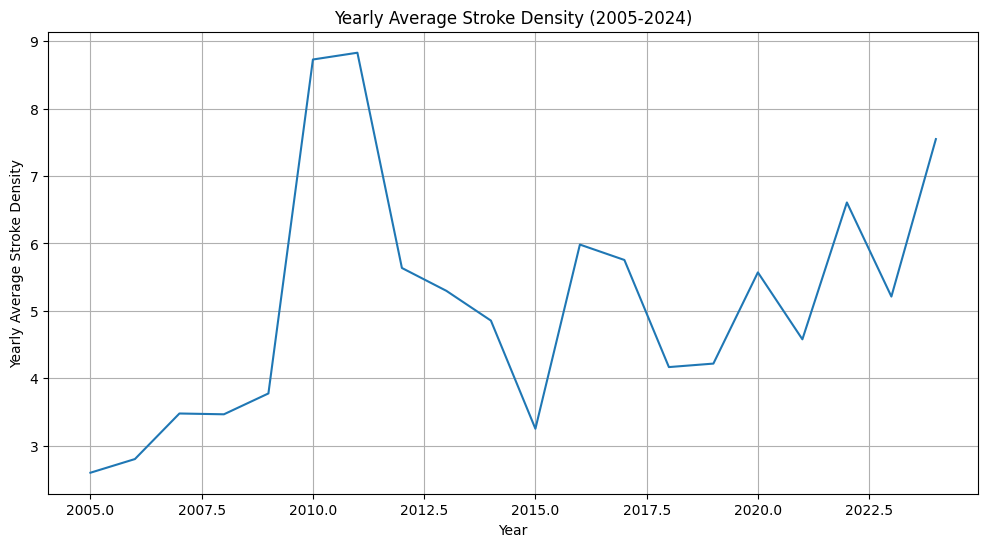

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_yearly_averages.index, df_yearly_averages['Yearly Average Stroke Density'])
plt.title("Yearly Average Stroke Density (2005-2024)")
plt.xlabel("Year")
plt.ylabel("Yearly Average Stroke Density")
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The process successfully calculated the monthly average stroke density for each year from 2005 to 2024 within the specified geographical region (latitude 10.5 to 12, longitude -74 to -72).
*   The yearly average stroke density was computed from the monthly averages for each year in the 2005-2024 period.
*   A table was created displaying the calculated yearly average stroke density for each year.
*   A line plot was generated visualizing the trend of yearly average stroke density from 2005 to 2024.

### Insights or Next Steps

*   Analyze the trend in the yearly average stroke density plot to identify any significant increases, decreases, or cyclical patterns over the observed period.
*   Consider performing statistical analysis on the yearly averages to determine the significance of any observed trends and potentially correlate them with other relevant environmental or climate data.


# Task
Generate monthly averages of stroke density for the years 2005 to 2024 from the file "stroke_density.csv", then create a table and a plot to visualize these monthly averages.

## Prepare data for table and plot

### Subtask:
Convert the dictionary of monthly averages by year into a format suitable for creating a table and plot.


**Reasoning**:
Convert the dictionary of monthly averages by year into a pandas DataFrame suitable for creating a table and plot.



In [8]:
df_monthly_averages = pd.DataFrame.from_dict(monthly_averages_by_year, orient='index')
df_monthly_averages.index.name = 'Year'
df_monthly_averages.columns = [f'Month {i+1}' for i in range(df_monthly_averages.shape[1])]

display(df_monthly_averages)

,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Month 7,Month 8,Month 9,Month 10,Month 11,Month 12
Year,,,,,,,,,,,,
2005,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...
2006,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...
2007,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...
2008,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...
2009,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...
2010,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...
2011,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4...,<xarray.DataArray 'stroke_density' ()> Size: 4..

**Reasoning**:
The DataFrame was created, but the values are still xarray DataArrays. Extract the scalar value from each DataArray to make the DataFrame suitable for plotting and further analysis.



In [9]:
for col in df_monthly_averages.columns:
    df_monthly_averages[col] = df_monthly_averages[col].apply(lambda x: x.item())

display(df_monthly_averages)

,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Month 7,Month 8,Month 9,Month 10,Month 11,Month 12
Year,,,,,,,,,,,,
2005,0.049188,0.003485,0.164404,2.036169,2.916699,1.885067,0.696799,1.836470,4.269099,11.359695,5.926569,0.013568
2006,0.032465,0.053345,0.161550,1.191267,4.687277,3.168718,0.819261,1.529129,3.973827,5.752719,11.920361,0.301707
2007,0.001695,0.079891,0.977837,4.186528,3.836270,2.658110,1.248001,6.329384,6.443611,8.154090,7.546353,0.243768
2008,0.001942,0.025176,0.531731,1.737284,2.961390,1.974602,2.365809,3.172858,5.609159,10.177597,12.571974,0.433437
2009,0.171174,0.157132,1.092994,1.248837,3.602735,4.002988,0.712395,1.841844,4.519647,14.435253,12.074493,1.416846
2010,0.064164,0.710672,11.153785,7.019309,5.963280,6.057315,8.125935,11.953509,12.452220,16.709385,14.295442,10.247419
2011,0.513210,1.172148,2.303495,3.490350,13.152347,5.813899,4.967409,5.275259,8.422363,18.790253,35.386124,6.673292
2012,0.008740,0.168441,0.654647,10.970390,9.171304,3.883238,1.678979,4.325281,9.044083,14.968836,10.948881,1.799852
2013,0.000242,0.138325,4.422033,3.271264,7.437720,3.146076,2.998363,5.043334,12.080944,15.796420,7.185114,2.028807


## Create a table of monthly averages

### Subtask:
Display the pandas DataFrame containing the monthly averages for each year.


**Reasoning**:
Display the pandas DataFrame containing the monthly averages for each year.



In [10]:
display(df_monthly_averages)

,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Month 7,Month 8,Month 9,Month 10,Month 11,Month 12
Year,,,,,,,,,,,,
2005,0.049188,0.003485,0.164404,2.036169,2.916699,1.885067,0.696799,1.836470,4.269099,11.359695,5.926569,0.013568
2006,0.032465,0.053345,0.161550,1.191267,4.687277,3.168718,0.819261,1.529129,3.973827,5.752719,11.920361,0.301707
2007,0.001695,0.079891,0.977837,4.186528,3.836270,2.658110,1.248001,6.329384,6.443611,8.154090,7.546353,0.243768
2008,0.001942,0.025176,0.531731,1.737284,2.961390,1.974602,2.365809,3.172858,5.609159,10.177597,12.571974,0.433437
2009,0.171174,0.157132,1.092994,1.248837,3.602735,4.002988,0.712395,1.841844,4.519647,14.435253,12.074493,1.416846
2010,0.064164,0.710672,11.153785,7.019309,5.963280,6.057315,8.125935,11.953509,12.452220,16.709385,14.295442,10.247419
2011,0.513210,1.172148,2.303495,3.490350,13.152347,5.813899,4.967409,5.275259,8.422363,18.790253,35.386124,6.673292
2012,0.008740,0.168441,0.654647,10.970390,9.171304,3.883238,1.678979,4.325281,9.044083,14.968836,10.948881,1.799852
2013,0.000242,0.138325,4.422033,3.271264,7.437720,3.146076,2.998363,5.043334,12.080944,15.796420,7.185114,2.028807


## Visualize monthly averages

### Subtask:
Create a plot to visualize the monthly average stroke density across the years.


**Reasoning**:
Generate a line plot to visualize the monthly average stroke density across the years using the `df_monthly_averages` DataFrame.



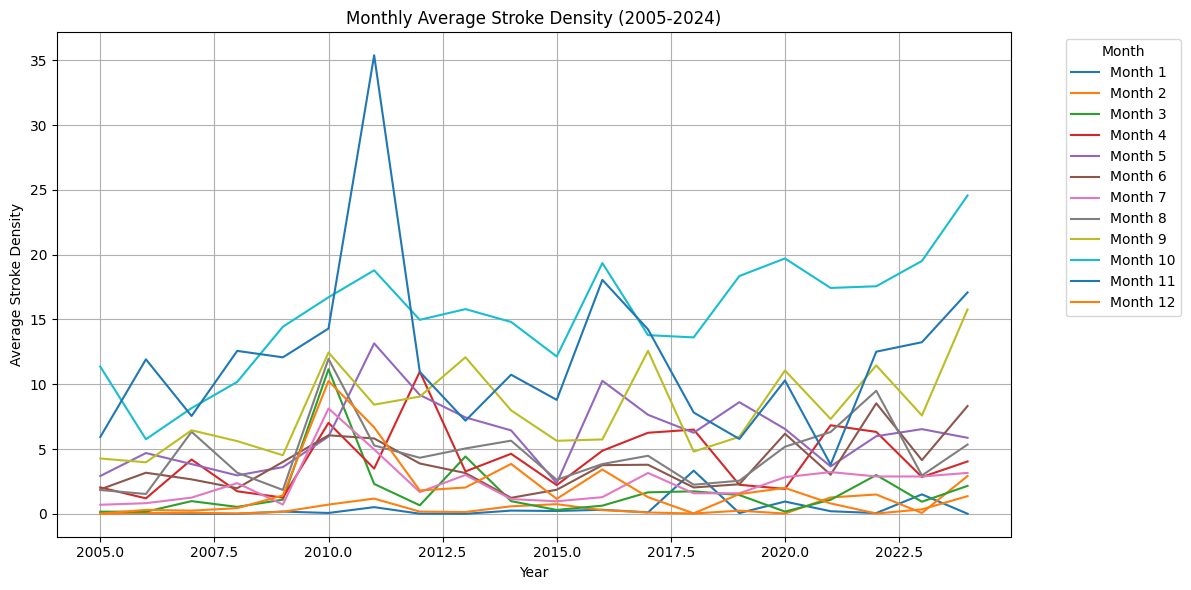

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for month in df_monthly_averages.columns:
    plt.plot(df_monthly_averages.index, df_monthly_averages[month], label=month)

plt.title("Monthly Average Stroke Density (2005-2024)")
plt.xlabel("Year")
plt.ylabel("Average Stroke Density")
plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The monthly average stroke density for the years 2005 to 2024 has been successfully calculated and organized into a table format, with years as rows and months as columns.
*   A line plot visualizing the monthly average stroke density from 2005 to 2024 has been successfully generated, showing the trend for each month over the years.

### Insights or Next Steps

*   Analyze the generated plot to identify any trends or patterns in monthly stroke density over the 20-year period, such as seasonal variations or long-term changes.
*   Consider calculating and visualizing the overall annual average stroke density to see if there is a general upward or downward trend across all months combined.


## Calculate average monthly stroke density across all years

### Subtask:
Calculate the average stroke density for each month across all years.

**Reasoning**:
Calculate the mean across the rows (years) of the `df_monthly_averages` DataFrame to get the average stroke density for each month across all years.

In [12]:
average_monthly_stroke_density = df_monthly_averages.mean()

display(average_monthly_stroke_density)

,0
Month 1,0.390713
Month 2,0.511632
Month 3,1.776649
Month 4,4.189935
Month 5,6.194989
Month 6,3.885542
Month 7,2.414017
Month 8,4.598703
Month 9,8.133410
Month 10,15.347665


## Visualize average monthly stroke density

### Subtask:
Create a bar plot to visualize the average monthly stroke density across all years.

**Reasoning**:
Generate a bar plot using the `average_monthly_stroke_density` Series to visualize the average stroke density for each month across all years.

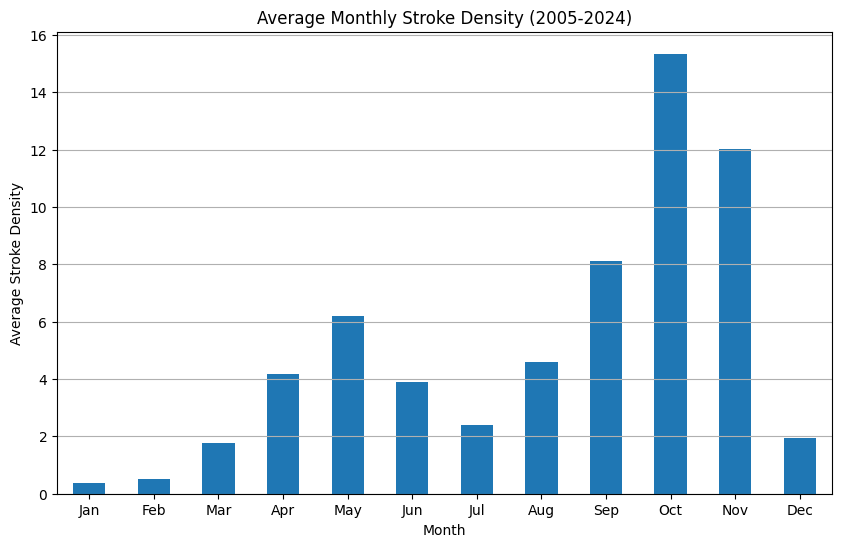

In [14]:
import matplotlib.pyplot as plt
import calendar

plt.figure(figsize=(10, 6))
average_monthly_stroke_density.plot(kind='bar')
plt.title("Average Monthly Stroke Density (2005-2024)")
plt.xlabel("Month")
plt.ylabel("Average Stroke Density")
plt.xticks(rotation=0)
plt.grid(axis='y')

# Change x-axis labels to month abbreviations
month_names = [calendar.month_abbr[i+1] for i in range(len(average_monthly_stroke_density))]
plt.xticks(range(len(month_names)), month_names)

plt.show()

## Summary:

### Data Analysis Key Findings

* The average stroke density for each month across all years from 2005 to 2024 has been calculated.
* A bar plot visualizing the average monthly stroke density has been generated, showing the variation in average stroke density throughout the year.

### Insights or Next Steps

* Analyze the bar plot to identify months with the highest and lowest average stroke density, which could indicate seasonal patterns.
* Consider comparing the average monthly stroke density to other environmental factors to explore potential correlations.